In [1]:
import itn.itn_dataset as itn_dataset
import utils

In [2]:
lesion_dataset = itn_dataset.ITNDatasetLesion(directory='valid', subset='isic', augment=False, transforms=[])

In [5]:
import matplotlib.pyplot as plt
plt.imshow(lesion_dataset[0][1].squeeze().numpy().transpose(1, 2, 0) + 0.5)

NameError: name 'lesion_dataset' is not defined

In [1]:
import data.datasets as datasets

In [2]:
dataset = datasets.get_test_dataset('eat')

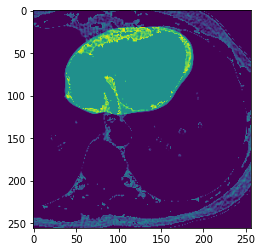

In [8]:
import matplotlib.pyplot as plt
plt.imshow(dataset[27][0].squeeze().numpy() + dataset[27][1].squeeze().numpy())

In [7]:
print(dataset[27][1].median())

tensor(0.)


[ -8. -17.]


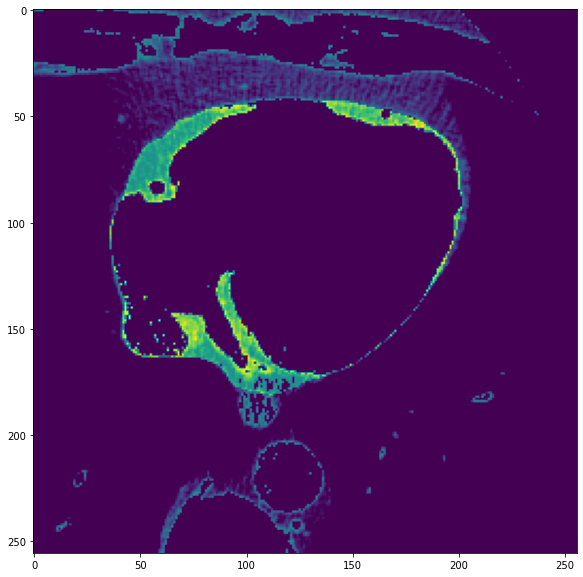

In [40]:
import numpy as np
import cv2 as cv
from skimage import data
from skimage.registration import phase_cross_correlation
from skimage.registration._phase_cross_correlation import _upsampled_dft
from scipy.ndimage import fourier_shift

x, y = dataset[60]
x = x.squeeze().numpy()
y = y.squeeze().numpy()

shift, error, diffphase = phase_cross_correlation(x, y)
M = np.float32([[1,0, shift[1]], [0,1, shift[0]]])
rows,cols = y.shape
dst = cv.warpAffine(y, M, (cols,rows), flags=cv.INTER_NEAREST)

plt.figure(figsize=(10, 10))
plt.imshow(x + dst)
plt.show()